In [2]:
import glob
import os.path
import numpy as np
import pandas as pd
import tifffile
import matplotlib.pyplot as plt
from scipy.io import loadmat
import datetime
import sqlite3

In [85]:
def convert_mat_to_databasable(metadata_file_path):
    metadata = loadmat(metadata_file_path)
    time = []
    integration = []
    wavelength = []
    intensity = []
    for md in metadata['imgInfo'][0]:
        year = int(md[0, 0][0][0][0])
        month = int(md[0, 0][0][0][1])
        day = int(md[0, 0][0][0][2])
        hour = int(md[0, 0][0][0][3])
        minute = int(md[0, 0][0][0][4])
        second = int(md[0, 0][0][0][5])
        dt = datetime.datetime(year, month, day, hour, minute, second)
        unix_timestamp = int(dt.timestamp())
        tau = float(md[0, 0][1][0][0])
        lam = int(md[0, 0][2][0][0])
        time.append(unix_timestamp)
        integration.append(tau)
        wavelength.append(lam)
        try:
            intense = float(md[0, 0][3][0][0])
            intensity.append(intense)
            int_missing = False
        except IndexError as e:
            int_missing = True
        
    indices = np.argsort(wavelength)
    if int_missing:
        return  (np.asarray(time)[indices], 
                 np.asarray(integration)[indices], 
                 np.asarray(wavelength)[indices], 
                 [], indices)
    else:
        return (np.asarray(time)[indices], 
                np.asarray(integration)[indices], 
                np.asarray(wavelength)[indices], 
                np.asarray(intensity)[indices],
                indices)

fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail


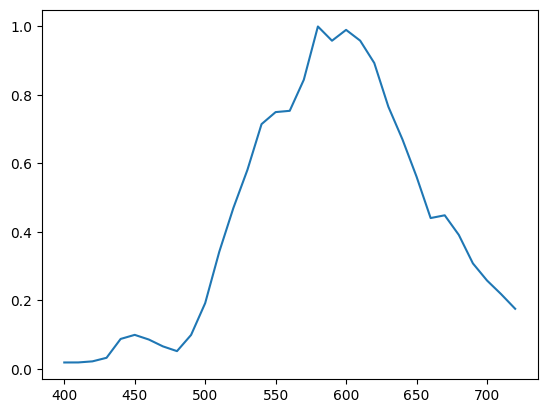

In [83]:
ref_path = r'E:\hsdfm_phantoms\02142025\ref_microspheres'
scaled_intensity = []
for cycle in os.listdir(ref_path):
    # Load settings data
    mat_file = glob.glob(os.path.join(ref_path, cycle, '*metadata.mat'))[0]
    ref_tim, ref_integration, ref_wavelength, ref_intensity, indices = convert_mat_to_databasable(mat_file)
    
    # Load average intensities
    mat_file = glob.glob(os.path.join(ref_path, cycle, '*imgIntensities.mat'))[0]
    intensity_md = loadmat(mat_file)
    ref_intensity = np.array(intensity_md['avgInt'][:, 0])
    ref_intensity = ref_intensity[indices]
    scaled_intensity.append(ref_intensity / ref_integration)
avg_scaled_intensity = np.mean(scaled_intensity, axis=0)
normalized_avg_int = avg_scaled_intensity / np.max(avg_scaled_intensity)
plt.plot(ref_wavelength, normalized_avg_int)
plt.show()

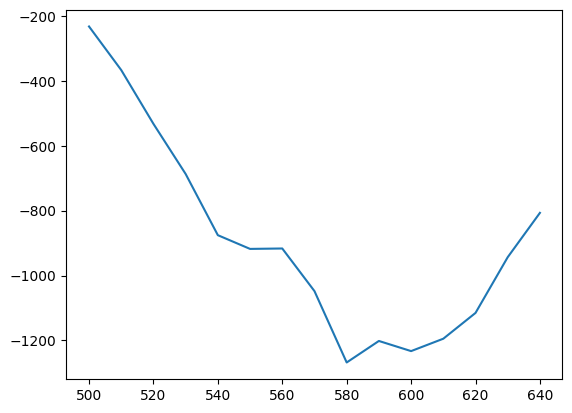

In [126]:
phantom1_2_ox_path = r'E:\hsdfm_phantoms\02142025\phantom1_2_ox'
ox_scaled_intensity = []
for cycle in os.listdir(phantom1_2_ox_path):
    # Load data
    mat_file = glob.glob(os.path.join(phantom1_2_ox_path, cycle, '*metadata.mat'))[0]
    time, integration, ox_wavelength, intensity, _ = convert_mat_to_databasable(mat_file)
    ox_scaled_intensity.append(intensity / integration)
avg_ox_intensity = np.mean(ox_scaled_intensity, axis=0)
bg_sub_ox_intensity = avg_ox_intensity - avg_scaled_intensity
start = int(np.where(ox_wavelength == 500)[0][0])
stop = int(np.where(ox_wavelength == 650)[0][0])
plt.plot(ox_wavelength[start:stop], bg_sub_ox_intensity[start:stop])
plt.show()

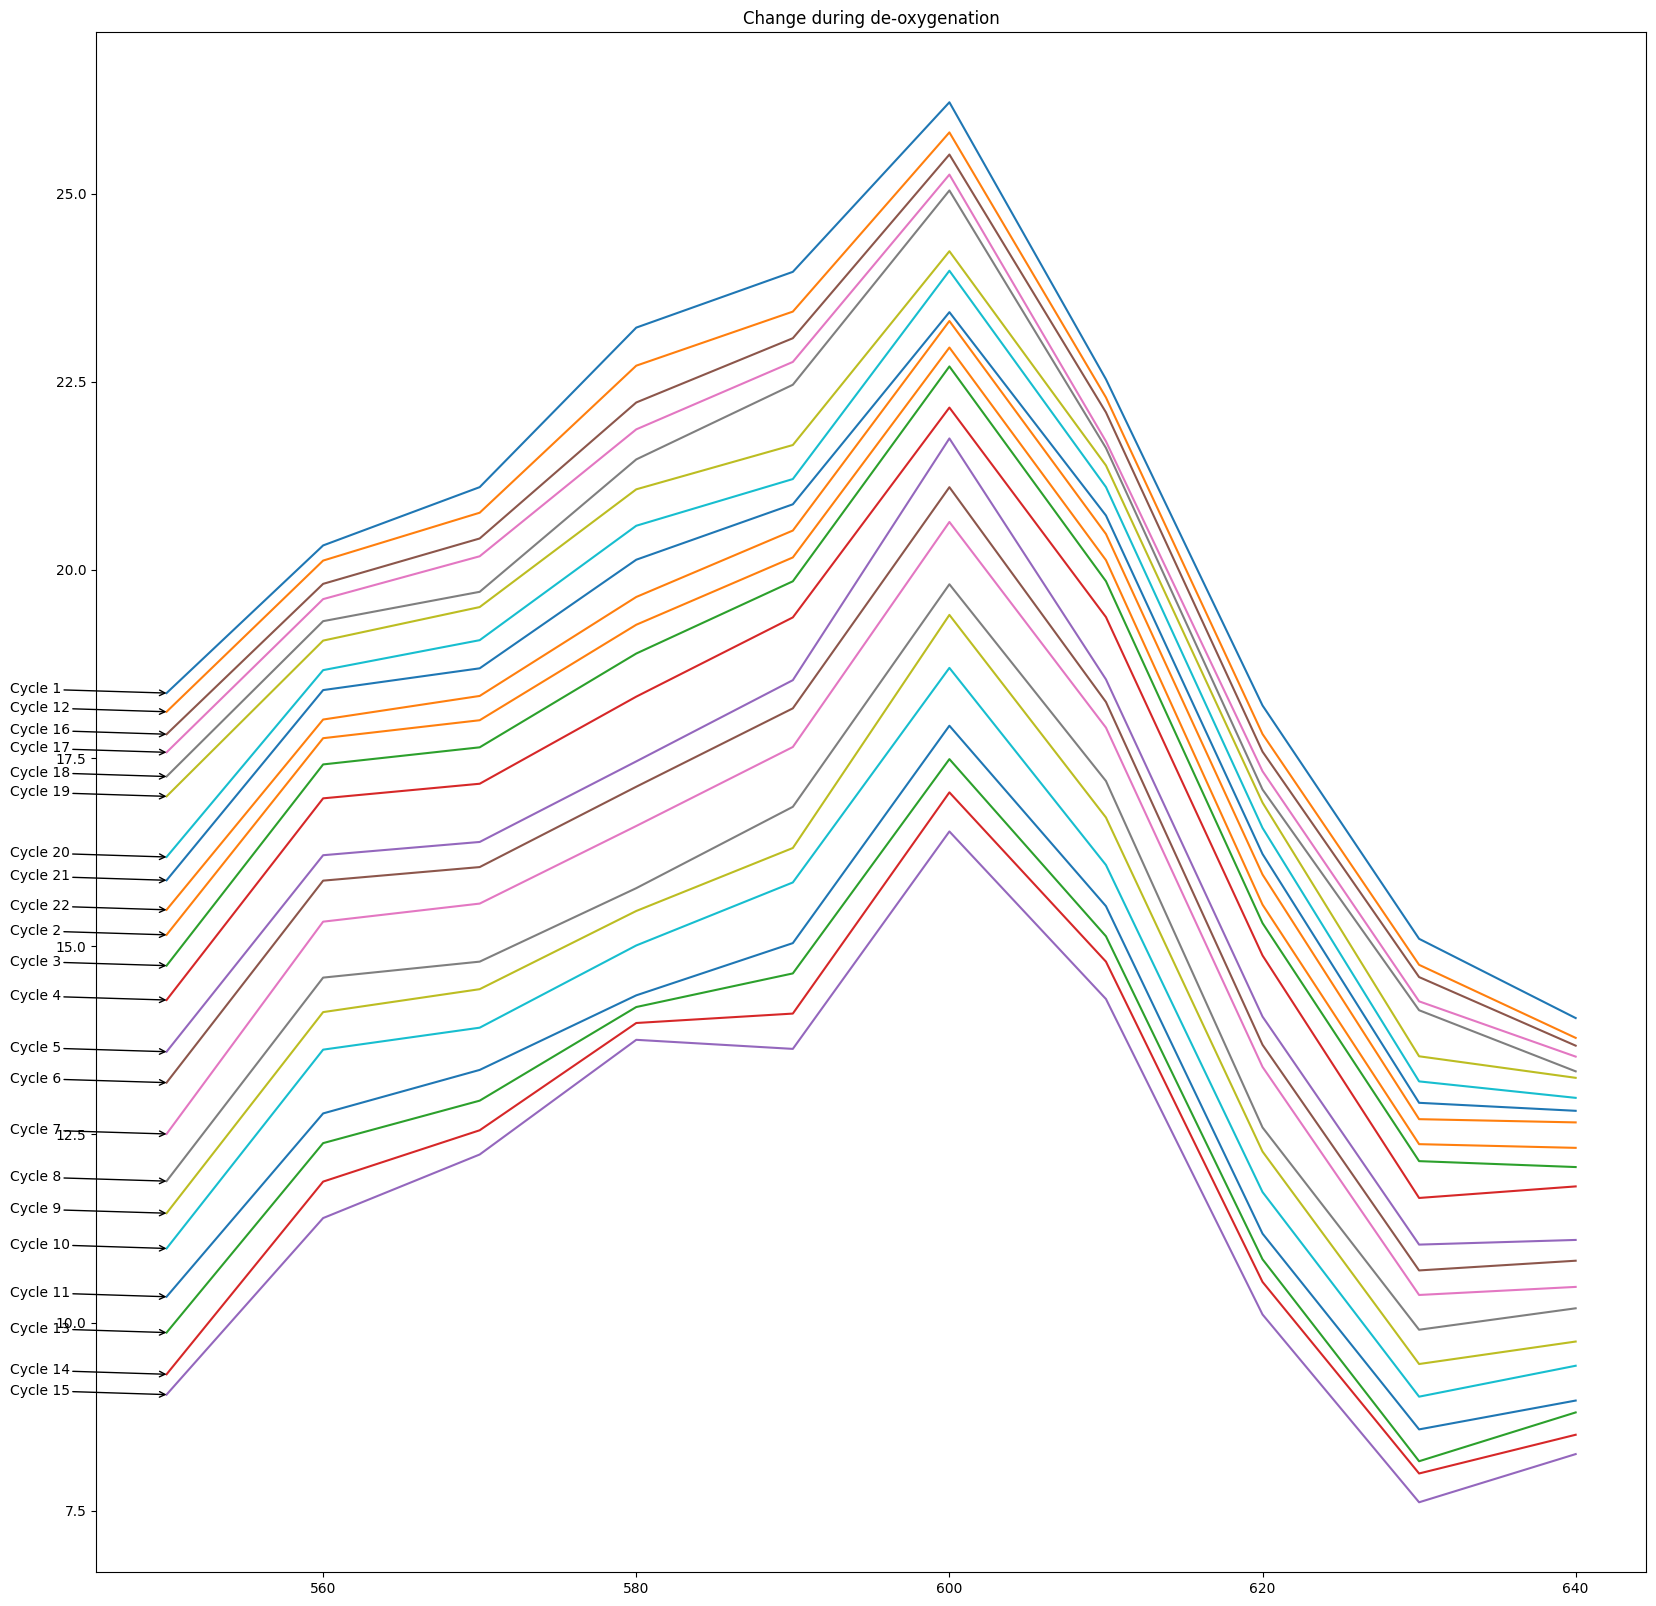

In [219]:
phantom1_2_deoxy_path = r'E:\hsdfm_phantoms\02142025\phantom1_2_deoxy'
deoxy_scaled_intensity = []
bg_sub_deoxy_intensity = []
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
for i, cycle in enumerate(os.listdir(phantom1_2_deoxy_path)):
    # Load data
    mat_file = glob.glob(os.path.join(phantom1_2_deoxy_path, cycle, '*metadata.mat'))[0]
    time, integration, deoxy_wavelength, intensity, _ = convert_mat_to_databasable(mat_file)
    deoxy_scaled_intensity.append(intensity / integration)
    indices = [int(np.where(ref_wavelength == dwl)[0][0]) for dwl in deoxy_wavelength]
    ref_bg = avg_scaled_intensity[indices]
    bg_sub_deoxy_intensity.append(intensity - ref_bg)
    start = int(np.where(ox_wavelength == 550)[0][0])
    stop = int(np.where(ox_wavelength == 650)[0][0])
    ref_y =  bg_sub_ox_intensity[start:stop]
    start = int(np.where(deoxy_wavelength == 550)[0][0])
    stop = int(np.where(deoxy_wavelength == 650)[0][0])
    ax.plot(deoxy_wavelength[start:stop], bg_sub_deoxy_intensity[-1][start:stop] - ref_y)
    ax.annotate(f'Cycle {i + 1}', (deoxy_wavelength[start],  bg_sub_deoxy_intensity[-1][start] - ref_y[0]), 
                (540, (bg_sub_deoxy_intensity[-1][start] - ref_y[0])), 
                arrowprops=dict(arrowstyle='->', shrinkA=0, shrinkB=0))
ax.set_title('Change during de-oxygenation')
# ax.legend()
plt.show()

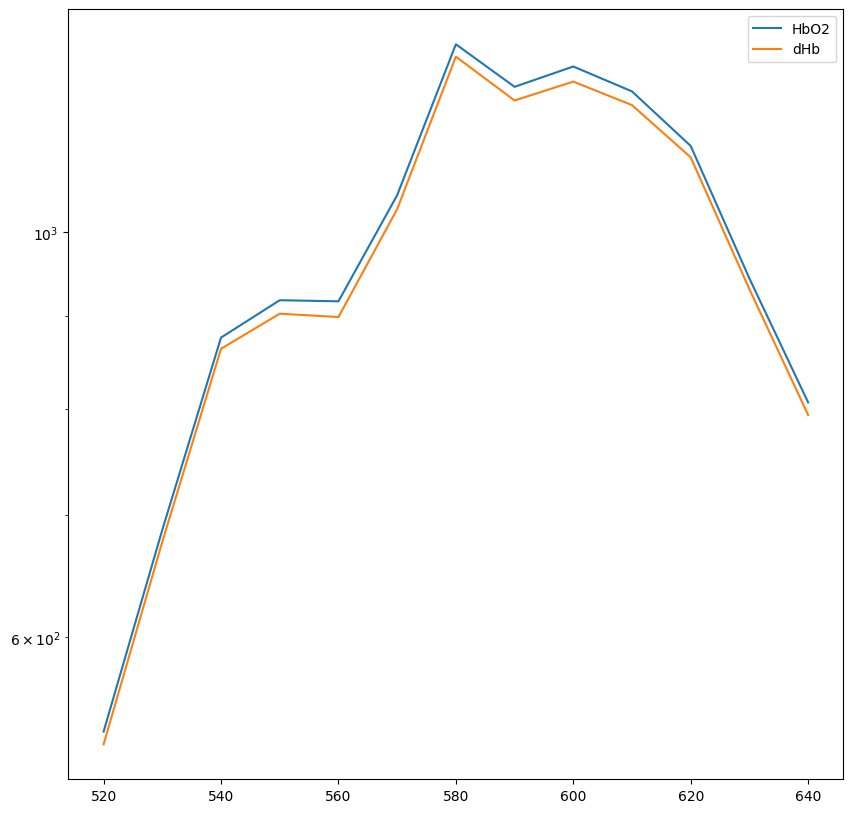

In [156]:
start = int(np.where(ox_wavelength == 520)[0][0])
stop = int(np.where(ox_wavelength == 650)[0][0])
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.plot(ox_wavelength[start:stop], -bg_sub_ox_intensity[start:stop], label='HbO2')

start = int(np.where(deoxy_wavelength == 520)[0][0])
stop = int(np.where(deoxy_wavelength == 650)[0][0])
# ax.plot(deoxy_wavelength[start:stop], -bg_sub_deoxy_intensity[int(0.5 * i)][start:stop])
ax.plot(deoxy_wavelength[start:stop], -bg_sub_deoxy_intensity[-1][start:stop], label='dHb')
ax.legend()
ax.set_yscale('log')
plt.show()